# Six Sigma Score Card

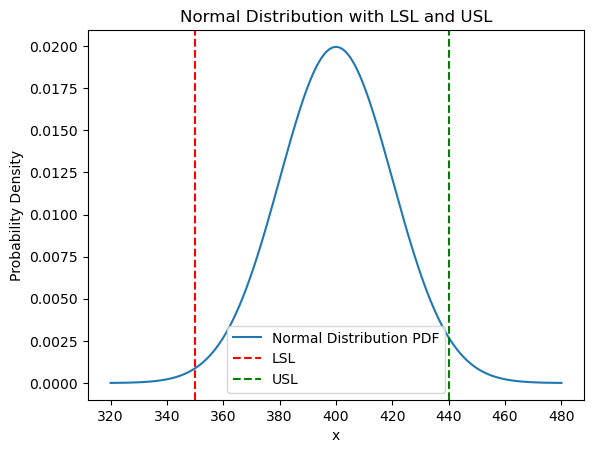

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define a function to plot a normal distribution with specified control limits
def plot_normal_distribution(LSL, USL, mean, sd):
    # Generate a range of x values around the mean, covering +/- 4 standard deviations
    x = np.linspace(mean - 4*sd, mean + 4*sd, 1000)
    
    # Calculate the normal distribution's probability density (y values) for each x
    y = stats.norm.pdf(x, mean, sd)
    
    # Plot the normal distribution curve
    plt.plot(x, y, label='Normal Distribution PDF')
    
    # Add vertical lines for the Lower Specification Limit (LSL) and Upper Specification Limit (USL)
    plt.axvline(x=LSL, color='r', linestyle='--', label='LSL')
    plt.axvline(x=USL, color='g', linestyle='--', label='USL')
    
    # Display the legend to show the curve and control limits
    plt.legend()
    
    # Title and labels for the plot
    plt.title('Normal Distribution with LSL and USL')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    
    # Show the plot
    plt.show()

# Example usage of the function:
# Define the Lower Specification Limit (LSL), Upper Specification Limit (USL),
# the mean of the distribution, and the standard deviation (sd)
LSL = 350
USL = 440
mean = 400
sd = 20

# Call the function with the specified parameters to plot the distribution
plot_normal_distribution(LSL, USL, mean, sd)

In [2]:
from zscore import * 
part_data = [
    {"lsl": 10, "usl": 20, "mu": 15, "sigma": 1, "term": "short"},
    {"lsl": np.nan, "usl": 50, "mu": 45, "sigma": 1, "term": "long"}
]

parts_dpo, parts_z_st, assembly_dpo, assembly_z_st = calculate_assembly_z_scores(part_data)

print("Parts DPO:", parts_dpo)
print("Parts Z scores:", parts_z_st)
print("Assembly DPO:", assembly_dpo)
print("Assembly Z score:", assembly_z_st)


Parts DPO: [0.00011998644089783461, 2.866515719235352e-07]
Parts Z scores: [5.172730122575041, 6.499999999970176]
Assembly DPO: 6.0136546234879074e-05
Assembly Z score: 5.345568836675545


In [3]:
part_data = {
    "lsl": 5,
    "usl": 15,
    "mu": 10,
    "sigma": 0.5,
    "term": "short"
}

dpo, z_st = calculate_part_z_scores(**part_data)
print("Part DPO:", dpo)
print("Part Z score:", z_st)

Part DPO: 1.4432899320127035e-14
Part Z score: 9.103306834784556


In [7]:
import pandas as pd

part_data = pd.DataFrame({
    "lsl": [10, np.nan],
    "usl": [20, 50],
    "mu": [15, 45],
    "sigma": [1, 1],
    "term": ["short", "long"]
})

parts_dpo, parts_z_st, assembly_dpo, assembly_z_st = calculate_assembly_z_scores(part_data)

print("Parts DPO:", parts_dpo)
print("Parts Z scores:", parts_z_st)
print("Assembly DPO:", assembly_dpo)
print("Assembly Z score:", assembly_z_st)

Parts DPO: [0.00011998644089783461, 2.866515719235352e-07]
Parts Z scores: [5.172730122575041, 6.499999999970176]
Assembly DPO: 6.0136546234879074e-05
Assembly Z score: 5.345568836675545


In [5]:
print(f'long term production data: {z_long_production(350, 440, 400, 20)}')
print(f'Short term production data: {z_short_production(350, 440, 400, 20)}')
print(f'Short term production data: {z_short_prototype(350, 440, 400, 20)}')


long term production data: (1.896305990953358, 3.396305990953358)
Short term production data: (0.0823283821716945, 1.5823283821716945)
Short term production data: (-0.9183394792509236, 1.896305990953358)


In [6]:
print(f'long term production data: {z_long_production(350, 440, 400, 10)}')
print(f'Short term production data: {z_short_production(350, 440, 400, 10)}')
print(f'Short term production data: {z_short_prototype(350, 440, 400, 10)}')

long term production data: (3.9978672172550103, 5.49786721725501)
Short term production data: (2.486943422469128, 3.986943422469128)
Short term production data: (1.4993552274348692, 3.9978672172550103)


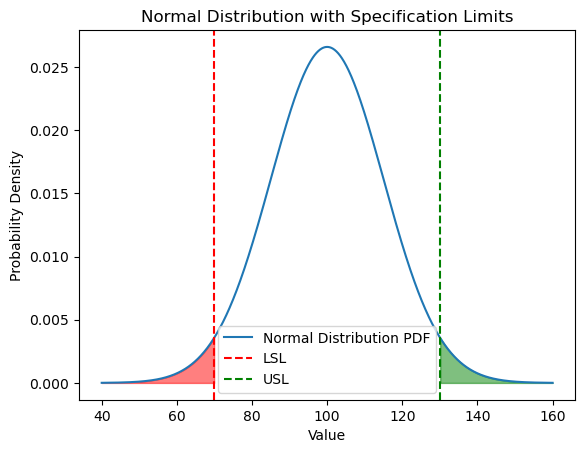

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_normal_distribution_with_spec_limits(mu, sigma, LSL=np.nan, USL=np.nan):
    # Generate an array of x values from mu - 4*sigma to mu + 4*sigma
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    
    # Compute the PDF of the normal distribution
    pdf = norm.pdf(x, mu, sigma)
    
    # Plot the PDF
    plt.plot(x, pdf, label='Normal Distribution PDF')
    
    # Plot vertical lines at LSL and USL if they are not nan
    if not np.isnan(LSL):
        plt.axvline(LSL, color='red', linestyle='--', label='LSL')
        # Shade the area below the PDF and left of the LSL
        plt.fill_between(x, pdf, where=(x < LSL), color='red', alpha=0.5)
        
    if not np.isnan(USL):
        plt.axvline(USL, color='green', linestyle='--', label='USL')
        # Shade the area below the PDF and right of the USL
        plt.fill_between(x, pdf, where=(x > USL), color='green', alpha=0.5)
        
    # Add a title and labels to the plot
    plt.title('Normal Distribution with Specification Limits')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    
    # Show legend
    plt.legend()
    
    # Display the plot
    plt.show()

# Example usage:
mu = 100  # Mean
sigma = 15  # Standard deviation
LSL = 70  # Lower specification limit
USL = 130  # Upper specification limit
plot_normal_distribution_with_spec_limits(mu, sigma, LSL, USL)
